In [55]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/testdiabete/diabete.csv


In [56]:
#verinin dosya yolunu ekleme
import pandas as pd
diabete=pd.read_csv("../input/testdiabete/diabete.csv")

In [57]:
import csv

header = ["notp", "pga", "dip","tsft","2hoursi","bmi","def","age","Class"]

with open('../input/testdiabete/diabete.csv', 'r') as fp:
    reader = csv.DictReader(fp, fieldnames=header)


    with open('diabete.csv', 'w', newline='') as fh: 
        writer = csv.DictWriter(fh, fieldnames=reader.fieldnames)
        writer.writeheader()
        header_mapping = next(reader)
        writer.writerows(reader)

In [58]:
diabete=pd.read_csv("diabete.csv")
diabete.head()

,notp,pga,dip,tsft,2hoursi,bmi,def,age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   notp     768 non-null    int64  
 1   pga      768 non-null    int64  
 2   dip      768 non-null    int64  
 3   tsft     768 non-null    int64  
 4   2hoursi  768 non-null    int64  
 5   bmi      768 non-null    float64
 6   def      768 non-null    float64
 7   age      768 non-null    int64  
 8   Class    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


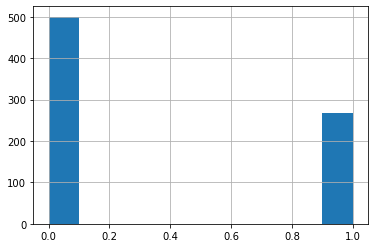

In [60]:
diabete["Class"].hist()

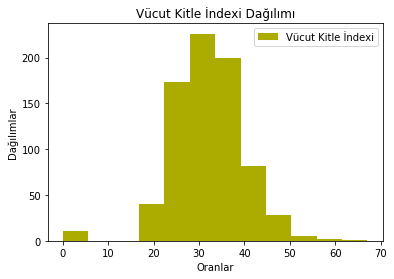

In [61]:
plt.hist(diabete.bmi,bins=12,color='#acac00',
         histtype="stepfilled",label="Vücut Kitle İndexi")

plt.xlabel("Oranlar")
plt.ylabel("Dağılımlar")
plt.legend()
plt.title("Vücut Kitle İndexi Dağılımı")
plt.show()

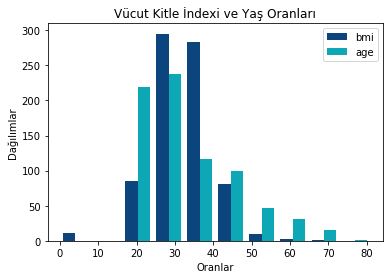

In [62]:
plt.hist([diabete.bmi,diabete.age],
         color=['#0c457d','#0ea7b5'],
         label=["bmi","age"])

plt.xlabel("Oranlar")

plt.ylabel("Dağılımlar")
plt.title("Vücut Kitle İndexi ve Yaş Oranları")
plt.legend() 
plt.show()

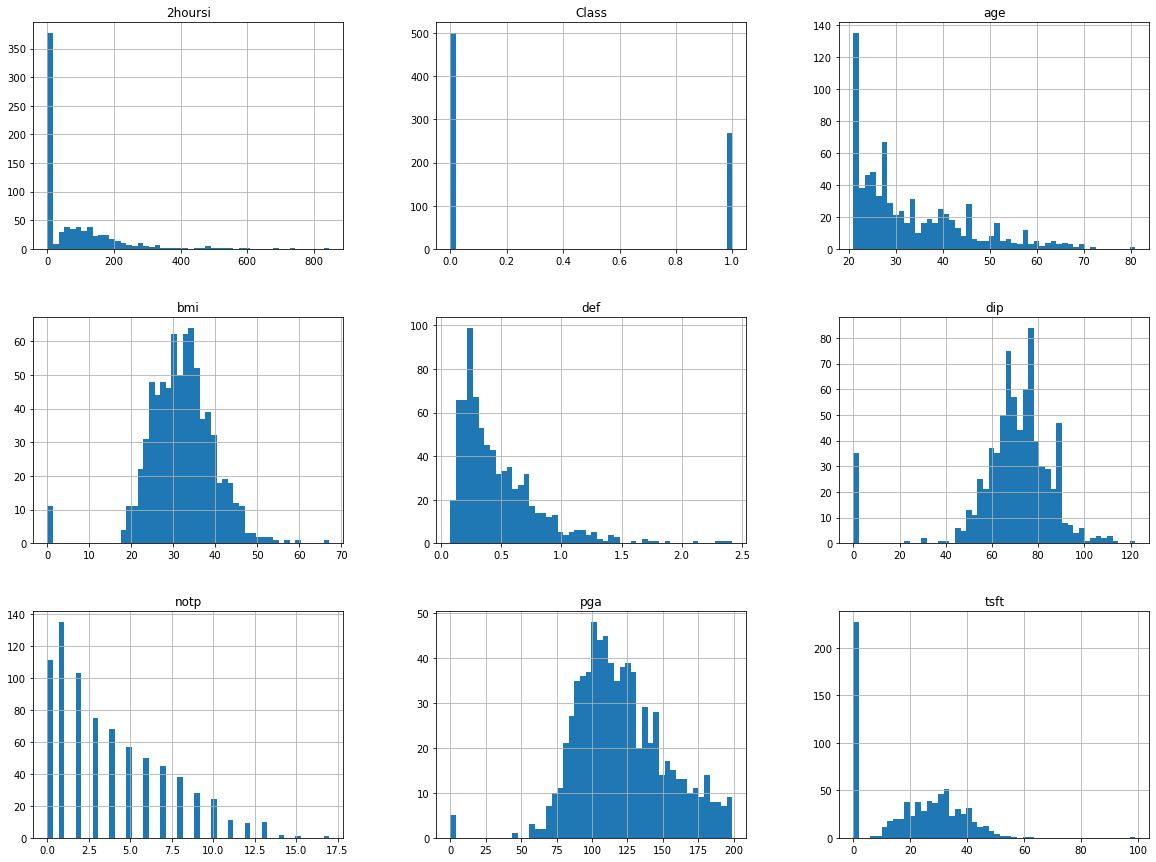

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
diabete.hist(bins=50, figsize=(20,15))
plt.show()

In [64]:
DiyabetOlmayan = len(diabete[diabete.Class == 0])
DiyabetOlan = len(diabete[diabete.Class == 1])
print("Diyabet Olmayanların Yüzdesi: {:.2f}%".format((DiyabetOlmayan / (len(diabete.Class))*100)))
print("Diyabet Olanların Yüzdesi: {:.2f}%".format((DiyabetOlan / (len(diabete.Class))*100)))

Diyabet Olmayanların Yüzdesi: 65.10%
Diyabet Olanların Yüzdesi: 34.90%


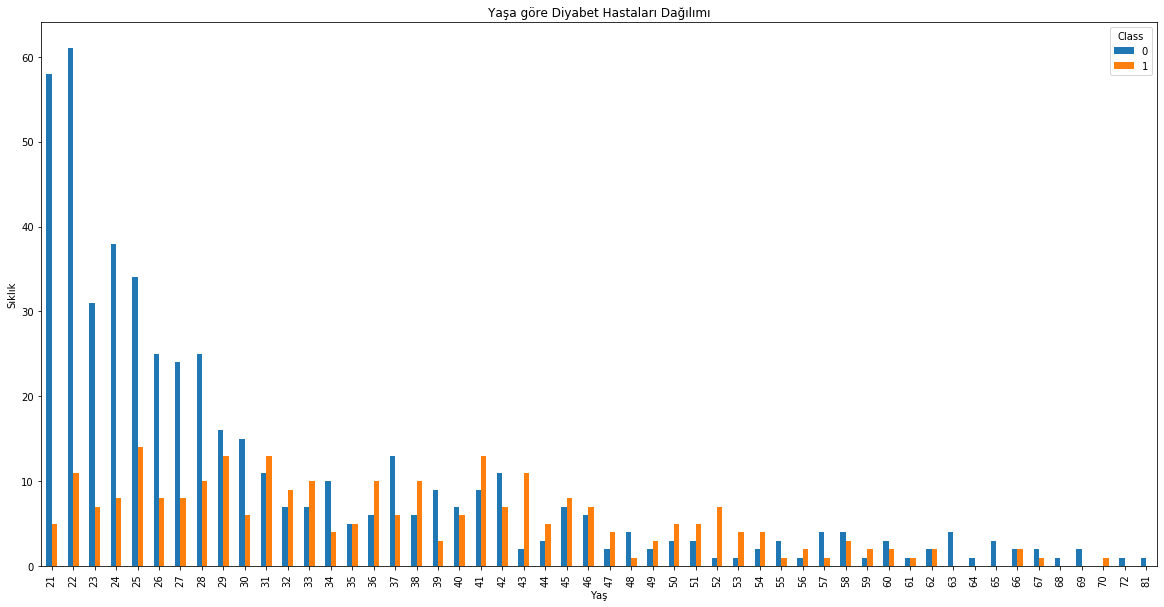

In [65]:
pd.crosstab(diabete.age,diabete.Class).plot(kind="bar",figsize=(20,10))
plt.title('Yaşa göre Diyabet Hastaları Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Sıklık')
plt.show()

In [66]:
diabete.groupby('age')['Class'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
21,63.0,0.079365,0.272479,0.0,0.00,0.0,0.00,1.0
22,72.0,0.152778,0.362298,0.0,0.00,0.0,0.00,1.0
23,38.0,0.184211,0.392859,0.0,0.00,0.0,0.00,1.0
24,46.0,0.173913,0.383223,0.0,0.00,0.0,0.00,1.0
25,48.0,0.291667,0.459340,0.0,0.00,0.0,1.00,1.0
26,33.0,0.242424,0.435194,0.0,0.00,0.0,0.00,1.0
27,32.0,0.250000,0.439941,0.0,0.00,0.0,0.25,1.0
28,35.0,0.285714,0.458349,0.0,0.00,0.0,1.00,1.0
29,29.0,0.448276,0.506120,0.0,0.00,0.0,1.00,1.0


<Figure size 864x288 with 0 Axes>

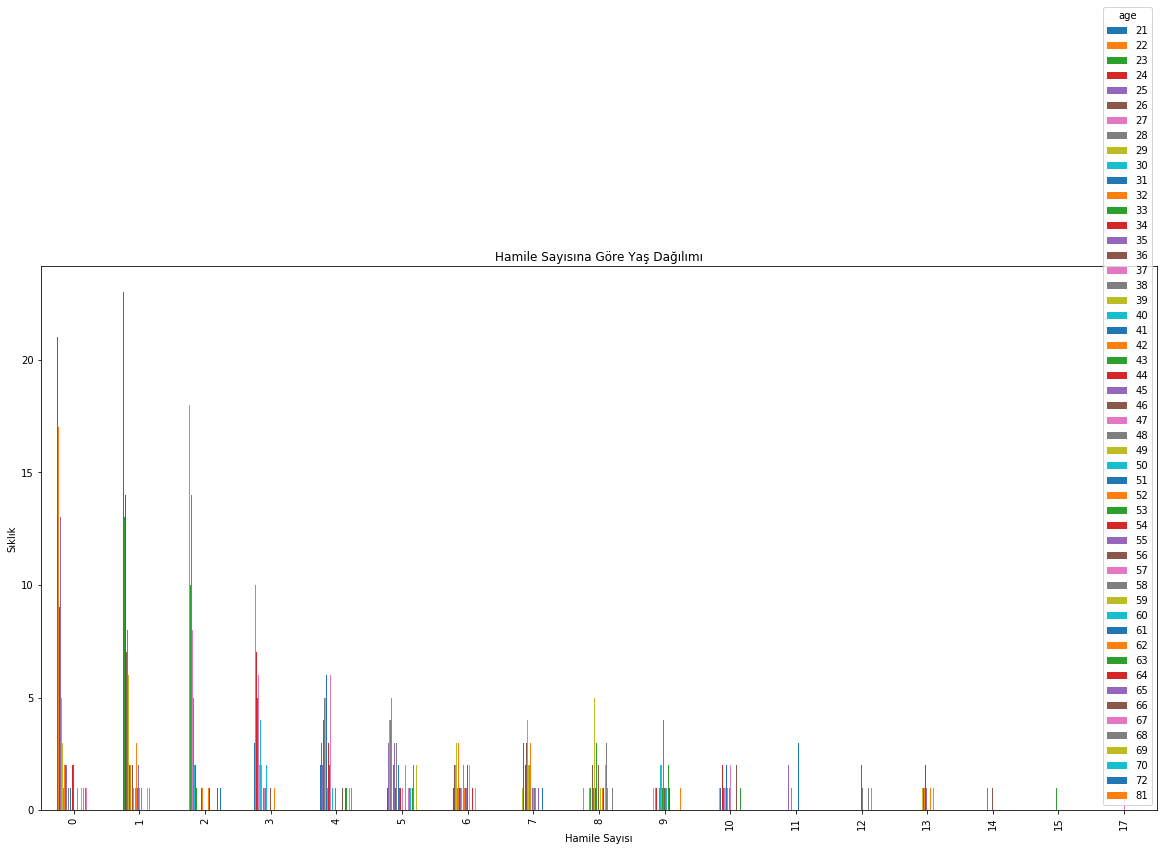

In [67]:
plt.figure(figsize=(12,4))
pd.crosstab(diabete.notp,diabete.age).plot(kind="bar",figsize=(20,10))
plt.title('Hamile Sayısına Göre Yaş Dağılımı')
plt.xlabel('Hamile Sayısı')
plt.ylabel('Sıklık')
plt.savefig(fname="hamile.png",facecolor="green")
plt.show()